In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [5]:
start = '2012-01-01'
end = '2024-12-21'

stock = 'GOOG'
data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [7]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.495003,16.562926,16.171750,16.185882,147611217
2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...
2024-12-16,197.934509,200.411683,193.889115,194.143830,32248600
2024-12-17,196.895676,202.649131,196.466172,198.304075,24129500


In [8]:
data.reset_index(inplace=True)

In [9]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495003,16.562926,16.171750,16.185882,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
3259,2024-12-16,197.934509,200.411683,193.889115,194.143830,32248600
3260,2024-12-17,196.895676,202.649131,196.466172,198.304075,24129500
3261,2024-12-18,189.933609,198.463899,189.064604,196.606015,27638400


In [10]:
# Mocing average of 100 days
ma_100_days = data.Close.rolling(100).mean()


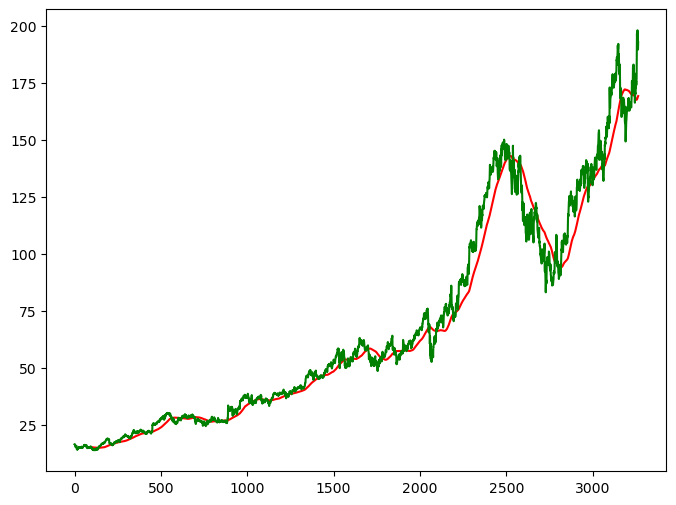

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [12]:
ma_200_days = data.Close.rolling(200).mean()

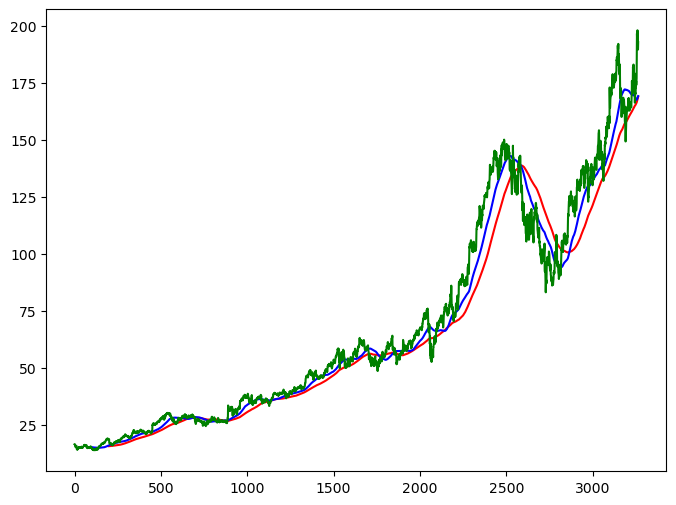

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'r')
plt.plot(ma_100_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [14]:
data.isnull().sum()

Price   Ticker
Date              0
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [15]:
data.dropna(inplace=True)

In [24]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [25]:
data_train.shape[0]

2611

In [26]:
data_test.shape[0]

653

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scaled = scaler.fit_transform(data_train)


In [31]:
x = []
y = []
for i in range(100,data_train_scaled.shape[0]):
    x.append(data_train_scaled[i-100:i])
    y.append(data_train_scaled[i,0])

In [32]:
x,y = np.array(x), np.array(y)

In [33]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [34]:
model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True, input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))

2025-05-19 15:01:55.571633: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/shubham-sharma/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [36]:
model.fit(x,y,epochs=50, batch_size=32, verbose=1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 228ms/step - loss: 0.0414
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 212ms/step - loss: 0.0053
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 206ms/step - loss: 0.0045
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 209ms/step - loss: 0.0047
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 229ms/step - loss: 0.0038
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 224ms/step - loss: 0.0040
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - loss: 0.0036
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 205ms/step - loss: 0.0035
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - loss: 0.0034
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - loss: 0.0032
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 204ms/step - loss: 0.0033
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - loss: 0.0032
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - loss: 0.0029
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 208ms/step - loss: 0.0036
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [41]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days,data_test], ignore_index=True)


In [43]:
data_test_scaled = scaler.fit_transform(data_test)

In [44]:
x = []
y = []
for i in range(100,data_test_scaled.shape[0]):
    x.append(data_test_scaled[i-100:i])
    y.append(data_test_scaled[i,0])

In [45]:
x,y = np.array(x), np.array(y)

In [46]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step


In [51]:
scale = 1/scaler.scale_

In [52]:
y_predict = y_predict*scale

In [53]:
y = y*scale

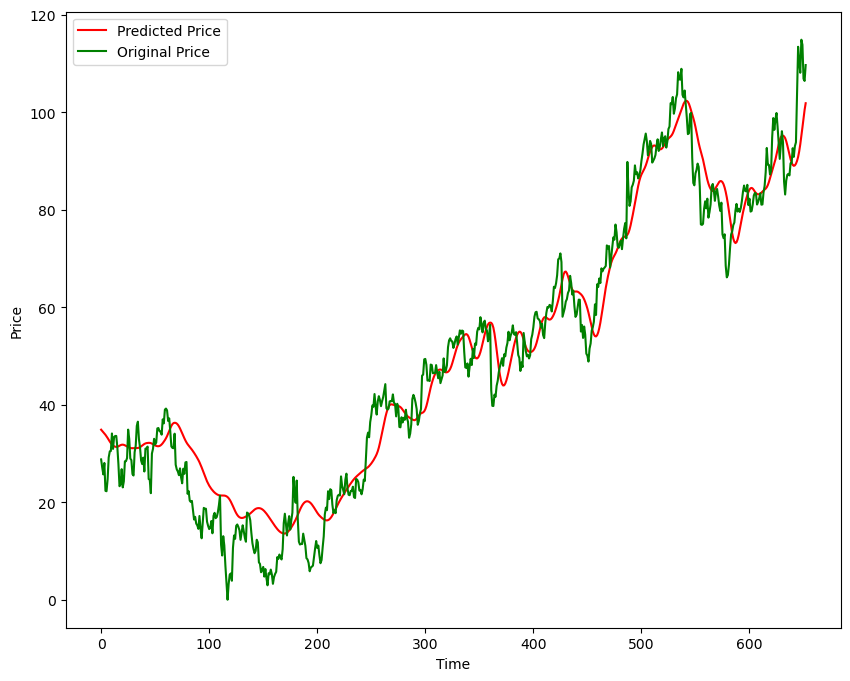

In [54]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label = 'Predicted Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [55]:
model.save('Stock Predictions Model.keras')